[('paviaU', (610, 340, 103), 'double')]
[('paviaU_gt', (610, 340), 'uint8')]


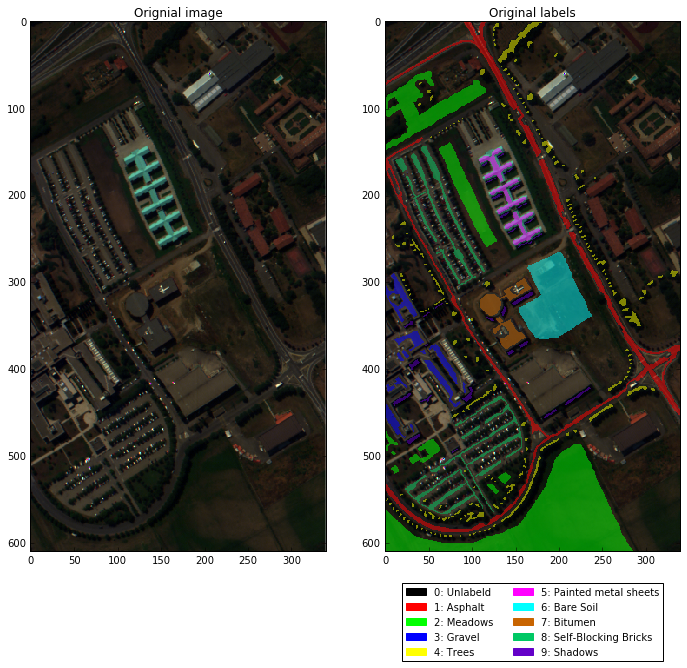

Label    Name                      Count     
0        Unlabeld                  164624    
1        Asphalt                   6631      
2        Meadows                   18649     
3        Gravel                    2099      
4        Trees                     3064      
5        Painted metal sheets      1345      
6        Bare Soil                 5029      
7        Bitumen                   1330      
8        Self-Blocking Bricks      3682      
9        Shadows                   947       


In [1]:
%run './../interface/hyperspectral_image.ipynb'

# Defining the model

This model is based on this: https://www.tensorflow.org/versions/r0.9/tutorials/tflearn/index.html#tf-contrib-learn-quickstart

In [2]:
%run './../interface/tensorflow_defaults.ipynb'

In [3]:
%run './../interface/tensorflow_functions.ipynb'

In [4]:
# Build 3 layer DNN with 10, 20, 10 units respectively. 
classifier = tf.contrib.learn.DNNClassifier(hidden_units=[10], n_classes=len(hyimage.labelClasses))

In [5]:
# Fit model
classifier.fit(x=hyimage.splitPixels(stratified=True, trainProportion=0.1).XTrain, 
               y=hyimage.splitPixels(stratified=True, trainProportion=0.1).YTrain.astype(np.int32), steps=1000000);

# Model evaluation

In [6]:
%run './../interface/model_evaluation_functions.ipynb'

In [7]:
classifier.evaluate(x=hyimage.splitPixels(stratified=True, trainProportion=0.1).XTrain, 
                    y=hyimage.splitPixels(stratified=True, trainProportion=0.1).YTrain.astype(np.int32))["accuracy"]

0.93546879

## Test data

In [8]:
classifier.evaluate(x=hyimage.splitPixels(stratified=True, trainProportion=0.1).XTest, 
                    y=hyimage.splitPixels(stratified=True, trainProportion=0.1).YTest.astype(np.int32))["accuracy"]

0.90711445

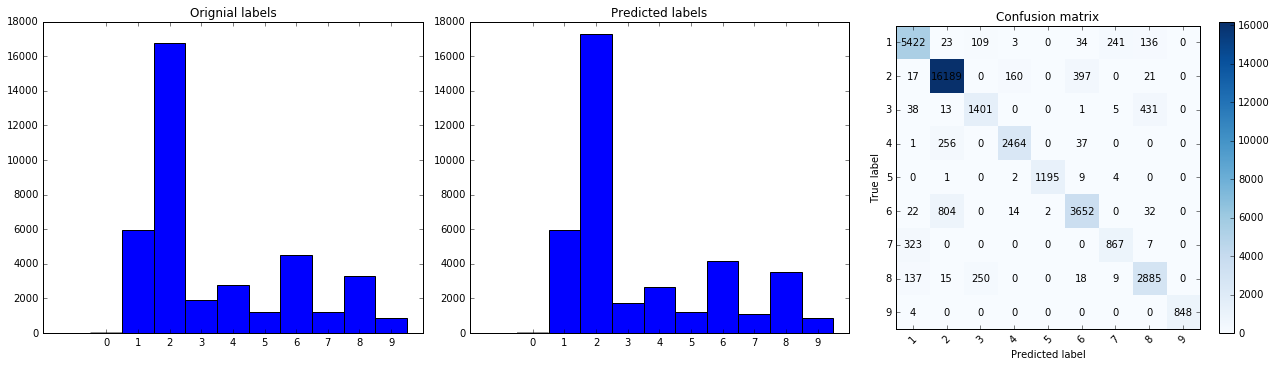

In [9]:
compareLabels(originalLabels=hyimage.splitPixels(stratified=True).YTest, 
              predictedLabels=classifier.predict(x=hyimage.splitPixels(stratified=True).XTest).reshape(-1,1))

## Overall visualisation

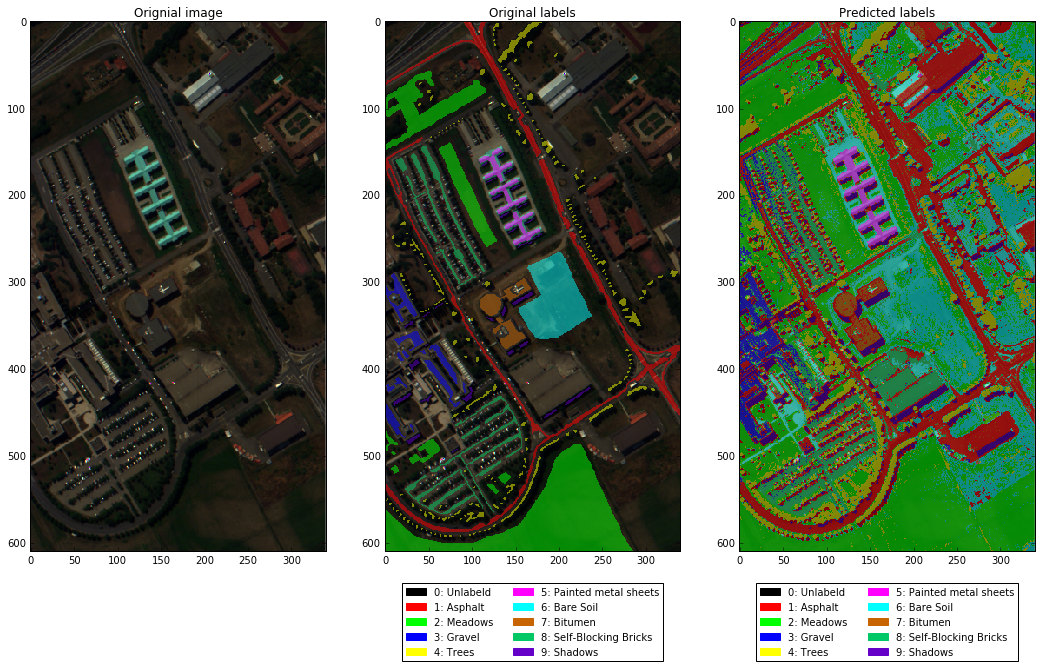

In [10]:
hyImageCompare(hyimage, classifier.predict(x=hyimage.pixelsScaled).reshape(hyimage.labels.shape))